Basics of Neural Networks


In [1]:
import numpy as np
X = np.array([[1, 2, 3],
			[3, 4, 1],
			[2, 5, 3]])

# multiplication
y = np.array([[.5, .3, .2]])

# transpose of y
y = y.T

# sigma value
sigm = 2

# find the delta
delt = np.random.random((3, 3)) - 1

for j in range(100):

	# find matrix 1. 100 layers.
	m1 = (y - (1/(1 + np.exp(-(np.dot((1/(1 + np.exp(
		-(np.dot(X, sigm))))), delt))))))*((1/(
			1 + np.exp(-(np.dot((1/(1 + np.exp(
				-(np.dot(X, sigm))))), delt)))))*(1-(1/(
					1 + np.exp(-(np.dot((1/(1 + np.exp(
						-(np.dot(X, sigm))))), delt)))))))

	# find matrix 2
	m2 = m1.dot(delt.T) * ((1/(1 + np.exp(-(np.dot(X, sigm)))))
						* (1-(1/(1 + np.exp(-(np.dot(X, sigm)))))))
	# find delta
	delt = delt + (1/(1 + np.exp(-(np.dot(X, sigm))))).T.dot(m1)

	# find sigma
	sigm = sigm + (X.T.dot(m2))
print(1/(1 + np.exp(-(np.dot(X, sigm)))))


[[0.99999314 0.99999374 0.99999354]
 [0.99999987 0.99999989 0.99999988]
 [1.         1.         1.        ]]


Basics of CNN (Convolutional Neural Networks)

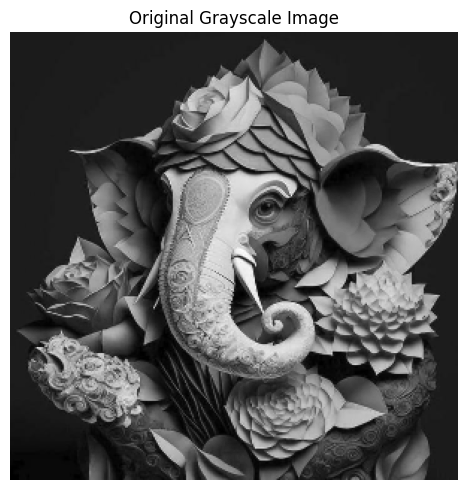

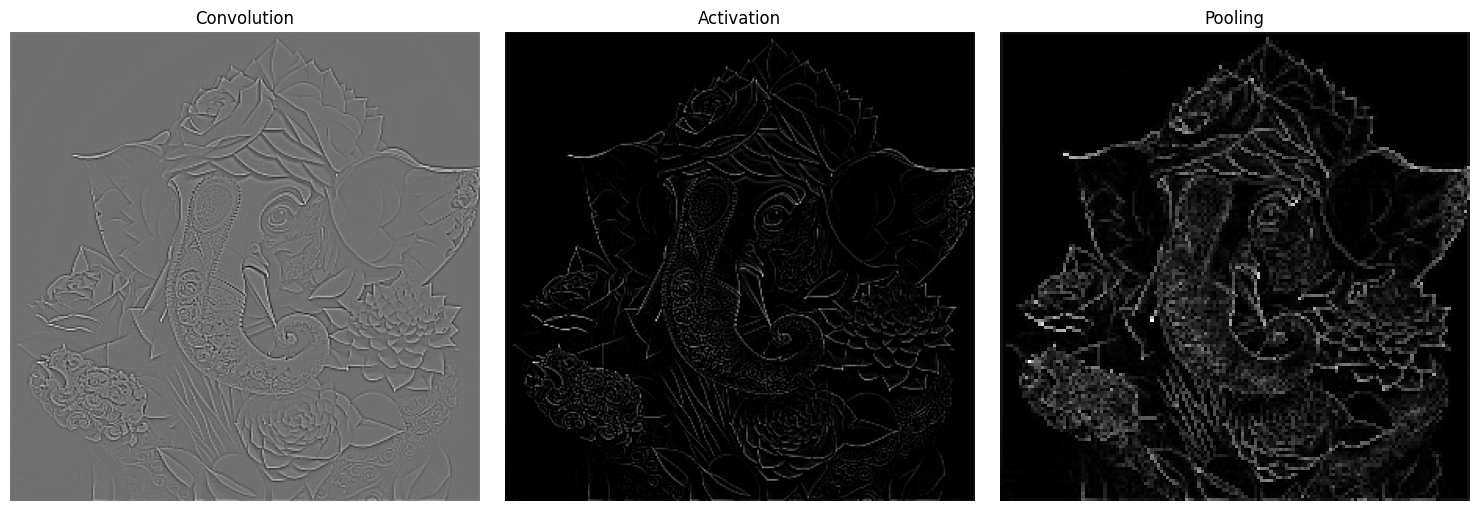

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Check if the image file exists
image_path = 'C:/Users/Lenovo/Downloads/Ganesh.jpg'  # Change this path as necessary
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The file {image_path} does not exist.")

# Set the parameters for matplotlib
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel (edge detection)
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=tf.float32)

# Load the image
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)  # Load as grayscale
image = tf.image.resize(image, size=[300, 300])

# Plot the original grayscale image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')
plt.show()

# Reformat the image and kernel for convolution
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)  # Add batch dimension
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])  # Reshape for convolution
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=[1, 1, 1, 1],  # Strides for the batch and height/width dimensions
    padding='SAME'
)

# Plot the convolved image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.axis('off')
plt.title('Convolution')

# Activation layer (ReLU)
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect), cmap='gray')
plt.axis('off')
plt.title('Activation')

# Pooling layer (Max pooling)
pool = tf.nn.pool
image_condense = pool(
    input=image_detect, 
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME'
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense), cmap='gray')
plt.axis('off')
plt.title('Pooling')

# Show all plots
plt.show()


GAN (Generative Adversarial Networks)

Using device: cpu


100%|██████████| 170498071/170498071 [03:13<00:00, 879219.74it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Epoch [1/10] Batch 100/1563                   Loss D: 0.4426, Loss G: 1.2217
Epoch [1/10] Batch 200/1563                   Loss D: 0.6601, Loss G: 0.9608
Epoch [1/10] Batch 300/1563                   Loss D: 0.5346, Loss G: 1.1914
Epoch [1/10] Batch 400/1563                   Loss D: 0.6404, Loss G: 1.2103
Epoch [1/10] Batch 500/1563                   Loss D: 0.6276, Loss G: 1.3067
Epoch [1/10] Batch 600/1563                   Loss D: 0.7403, Loss G: 0.8939
Epoch [1/10] Batch 700/1563                   Loss D: 0.8113, Loss G: 0.7774
Epoch [1/10] Batch 800/1563                   Loss D: 0.6915, Loss G: 0.9972
Epoch [1/10] Batch 900/1563                   Loss D: 0.6859, Loss G: 0.8662
Epoch [1/10] Batch 1000/1563                   Loss D: 0.8129, Loss G: 0.7800
Epoch [1/10] Batch 1100/1563                   Loss D: 0.5921, Loss G: 1.1500
Epoch [1/10] Batch 1200/1563                   Loss D: 0.5872, Loss G: 1.1539
Epoch [1/10] Batch 130

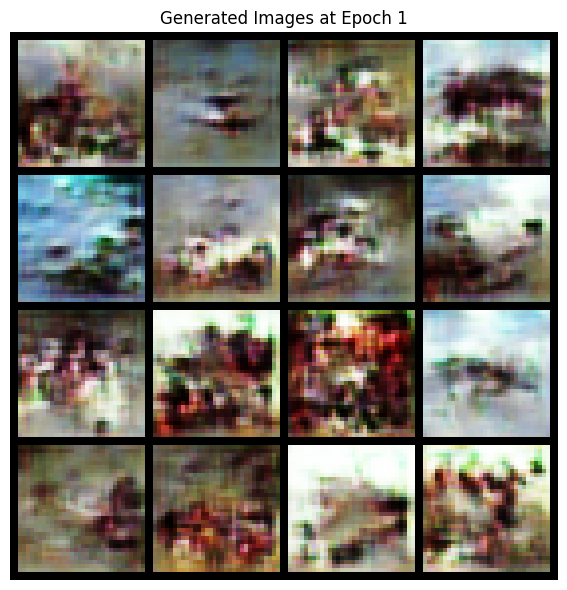

Epoch [2/10] Batch 100/1563                   Loss D: 0.4928, Loss G: 1.1841
Epoch [2/10] Batch 200/1563                   Loss D: 0.6605, Loss G: 0.9139
Epoch [2/10] Batch 300/1563                   Loss D: 0.6165, Loss G: 1.2835
Epoch [2/10] Batch 400/1563                   Loss D: 0.5989, Loss G: 1.0337
Epoch [2/10] Batch 500/1563                   Loss D: 0.6761, Loss G: 1.3033
Epoch [2/10] Batch 600/1563                   Loss D: 0.7398, Loss G: 0.9872
Epoch [2/10] Batch 700/1563                   Loss D: 0.5649, Loss G: 0.9390
Epoch [2/10] Batch 800/1563                   Loss D: 0.5666, Loss G: 0.9032
Epoch [2/10] Batch 900/1563                   Loss D: 0.5395, Loss G: 1.2985
Epoch [2/10] Batch 1000/1563                   Loss D: 0.8883, Loss G: 0.7225
Epoch [2/10] Batch 1100/1563                   Loss D: 0.6369, Loss G: 0.9084
Epoch [2/10] Batch 1200/1563                   Loss D: 0.6220, Loss G: 0.8673
Epoch [2/10] Batch 1300/1563                   Loss D: 0.6945, Loss G: 0.

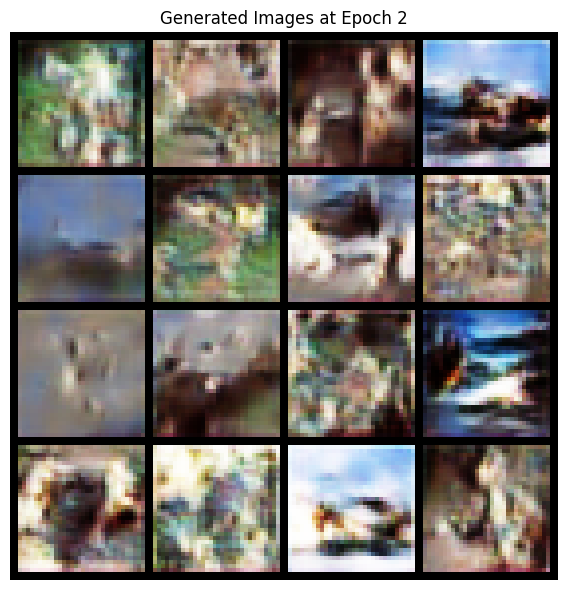

Epoch [3/10] Batch 100/1563                   Loss D: 0.4286, Loss G: 1.4485
Epoch [3/10] Batch 200/1563                   Loss D: 0.5438, Loss G: 1.4645
Epoch [3/10] Batch 300/1563                   Loss D: 0.8182, Loss G: 0.7693
Epoch [3/10] Batch 400/1563                   Loss D: 0.5850, Loss G: 1.1009
Epoch [3/10] Batch 500/1563                   Loss D: 0.6040, Loss G: 0.8549
Epoch [3/10] Batch 600/1563                   Loss D: 0.5531, Loss G: 0.9967
Epoch [3/10] Batch 700/1563                   Loss D: 0.7557, Loss G: 1.0826
Epoch [3/10] Batch 800/1563                   Loss D: 0.5462, Loss G: 0.8877
Epoch [3/10] Batch 900/1563                   Loss D: 0.4254, Loss G: 1.2173
Epoch [3/10] Batch 1000/1563                   Loss D: 0.6270, Loss G: 0.7138
Epoch [3/10] Batch 1100/1563                   Loss D: 0.5901, Loss G: 0.7151
Epoch [3/10] Batch 1200/1563                   Loss D: 0.6325, Loss G: 1.1533
Epoch [3/10] Batch 1300/1563                   Loss D: 0.5238, Loss G: 0.

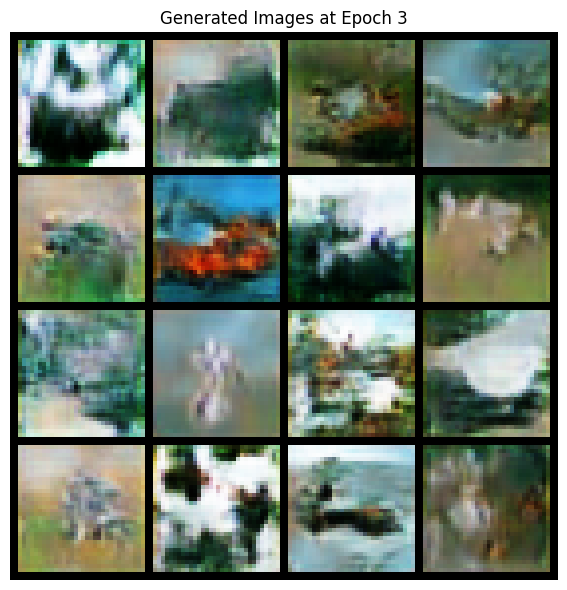

Epoch [4/10] Batch 100/1563                   Loss D: 0.3871, Loss G: 1.5013
Epoch [4/10] Batch 200/1563                   Loss D: 0.5255, Loss G: 0.9363
Epoch [4/10] Batch 300/1563                   Loss D: 0.5331, Loss G: 0.9617
Epoch [4/10] Batch 400/1563                   Loss D: 0.4493, Loss G: 1.3912
Epoch [4/10] Batch 500/1563                   Loss D: 0.6451, Loss G: 0.6880
Epoch [4/10] Batch 600/1563                   Loss D: 0.5200, Loss G: 1.0336
Epoch [4/10] Batch 700/1563                   Loss D: 0.7914, Loss G: 0.8975
Epoch [4/10] Batch 800/1563                   Loss D: 0.5026, Loss G: 1.3529
Epoch [4/10] Batch 900/1563                   Loss D: 0.6543, Loss G: 1.0202
Epoch [4/10] Batch 1000/1563                   Loss D: 0.5469, Loss G: 0.7196
Epoch [4/10] Batch 1100/1563                   Loss D: 0.5301, Loss G: 1.1569
Epoch [4/10] Batch 1200/1563                   Loss D: 0.8304, Loss G: 1.1001
Epoch [4/10] Batch 1300/1563                   Loss D: 0.4038, Loss G: 1.

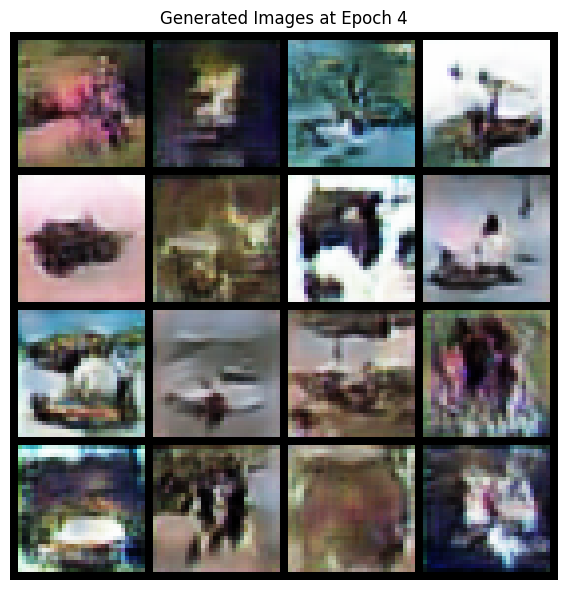

Epoch [5/10] Batch 100/1563                   Loss D: 0.7513, Loss G: 1.1862
Epoch [5/10] Batch 200/1563                   Loss D: 0.8012, Loss G: 2.5616
Epoch [5/10] Batch 300/1563                   Loss D: 0.8307, Loss G: 0.9923
Epoch [5/10] Batch 400/1563                   Loss D: 0.6678, Loss G: 1.4083
Epoch [5/10] Batch 500/1563                   Loss D: 0.6691, Loss G: 0.8612
Epoch [5/10] Batch 600/1563                   Loss D: 0.5215, Loss G: 1.6597
Epoch [5/10] Batch 700/1563                   Loss D: 0.5375, Loss G: 1.1531
Epoch [5/10] Batch 800/1563                   Loss D: 1.0536, Loss G: 1.0686
Epoch [5/10] Batch 900/1563                   Loss D: 0.7065, Loss G: 0.9936
Epoch [5/10] Batch 1000/1563                   Loss D: 0.6225, Loss G: 1.4842
Epoch [5/10] Batch 1100/1563                   Loss D: 0.6283, Loss G: 1.5191
Epoch [5/10] Batch 1200/1563                   Loss D: 0.6747, Loss G: 1.3739
Epoch [5/10] Batch 1300/1563                   Loss D: 0.6286, Loss G: 1.

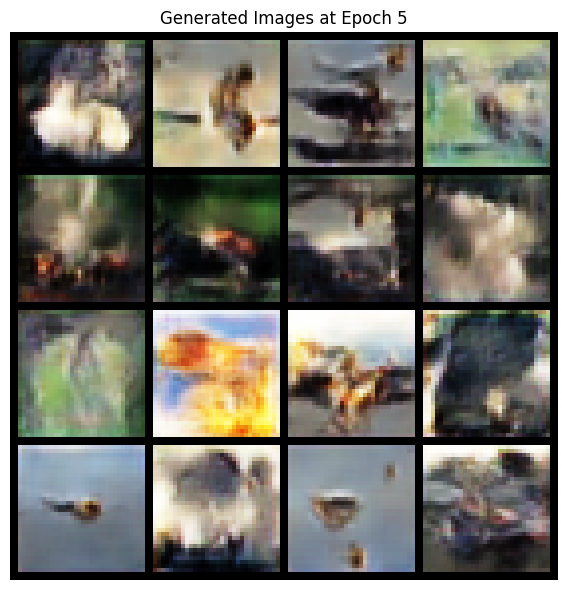

Epoch [6/10] Batch 100/1563                   Loss D: 0.5997, Loss G: 1.1176
Epoch [6/10] Batch 200/1563                   Loss D: 0.5395, Loss G: 0.6774
Epoch [6/10] Batch 300/1563                   Loss D: 0.6199, Loss G: 1.3094
Epoch [6/10] Batch 400/1563                   Loss D: 0.7005, Loss G: 0.9893
Epoch [6/10] Batch 500/1563                   Loss D: 0.5885, Loss G: 0.7472
Epoch [6/10] Batch 600/1563                   Loss D: 0.3743, Loss G: 1.5724
Epoch [6/10] Batch 700/1563                   Loss D: 0.6361, Loss G: 1.2482
Epoch [6/10] Batch 800/1563                   Loss D: 0.5183, Loss G: 0.9837
Epoch [6/10] Batch 900/1563                   Loss D: 0.5744, Loss G: 1.2932
Epoch [6/10] Batch 1000/1563                   Loss D: 0.5056, Loss G: 1.4910
Epoch [6/10] Batch 1100/1563                   Loss D: 0.5314, Loss G: 1.1549
Epoch [6/10] Batch 1200/1563                   Loss D: 0.5196, Loss G: 1.2729
Epoch [6/10] Batch 1300/1563                   Loss D: 0.7833, Loss G: 0.

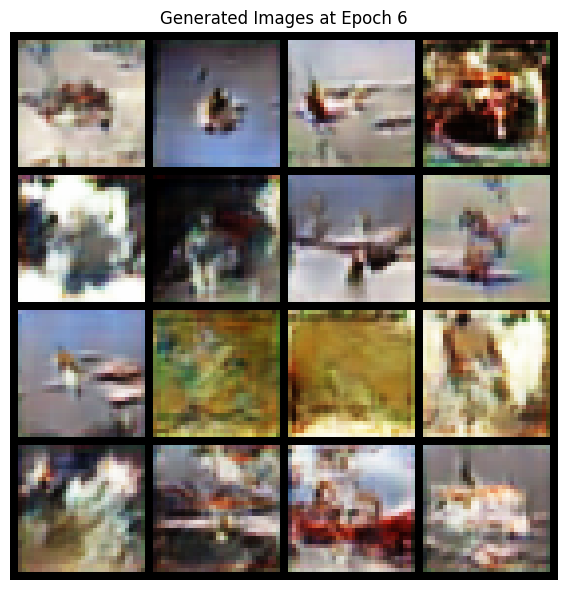

Epoch [7/10] Batch 100/1563                   Loss D: 0.4605, Loss G: 1.4870
Epoch [7/10] Batch 200/1563                   Loss D: 1.0332, Loss G: 1.1044
Epoch [7/10] Batch 300/1563                   Loss D: 0.3462, Loss G: 1.5486
Epoch [7/10] Batch 400/1563                   Loss D: 0.6410, Loss G: 1.2062
Epoch [7/10] Batch 500/1563                   Loss D: 0.6344, Loss G: 0.8928
Epoch [7/10] Batch 600/1563                   Loss D: 0.4049, Loss G: 0.8734
Epoch [7/10] Batch 700/1563                   Loss D: 0.6198, Loss G: 0.8566
Epoch [7/10] Batch 800/1563                   Loss D: 0.7052, Loss G: 0.8072
Epoch [7/10] Batch 900/1563                   Loss D: 0.5582, Loss G: 1.0539
Epoch [7/10] Batch 1000/1563                   Loss D: 0.5254, Loss G: 1.4203
Epoch [7/10] Batch 1100/1563                   Loss D: 0.4230, Loss G: 1.3697
Epoch [7/10] Batch 1200/1563                   Loss D: 0.7132, Loss G: 1.4255
Epoch [7/10] Batch 1300/1563                   Loss D: 0.5011, Loss G: 0.

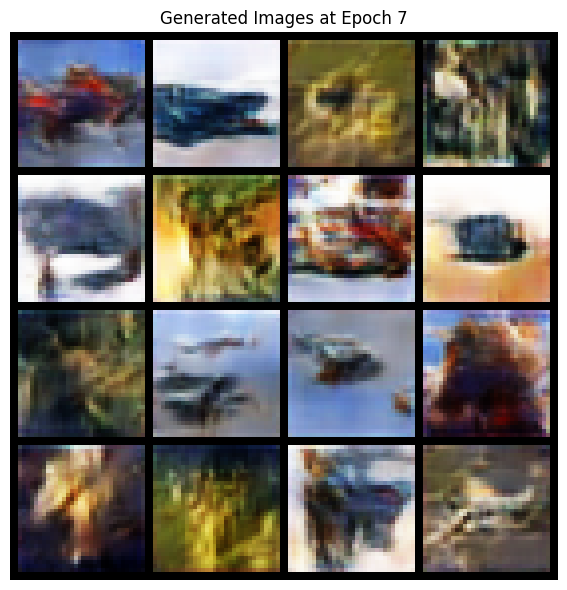

Epoch [8/10] Batch 100/1563                   Loss D: 0.4476, Loss G: 1.2608
Epoch [8/10] Batch 200/1563                   Loss D: 0.5432, Loss G: 1.0399
Epoch [8/10] Batch 300/1563                   Loss D: 0.5836, Loss G: 1.1348
Epoch [8/10] Batch 400/1563                   Loss D: 0.8066, Loss G: 0.5669
Epoch [8/10] Batch 500/1563                   Loss D: 0.4671, Loss G: 1.7779
Epoch [8/10] Batch 600/1563                   Loss D: 0.6212, Loss G: 1.0623
Epoch [8/10] Batch 700/1563                   Loss D: 0.7798, Loss G: 0.9712
Epoch [8/10] Batch 800/1563                   Loss D: 0.5028, Loss G: 1.1689
Epoch [8/10] Batch 900/1563                   Loss D: 0.5554, Loss G: 1.1321
Epoch [8/10] Batch 1000/1563                   Loss D: 0.6847, Loss G: 1.1841
Epoch [8/10] Batch 1100/1563                   Loss D: 0.5464, Loss G: 1.8366


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Set Device
# ---------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# ---------------------------
# Define Transformations
# ---------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# ---------------------------
# Load CIFAR-10 Dataset
# ---------------------------
train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

# ---------------------------
# Hyperparameters
# ---------------------------
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10

# ---------------------------
# Define the Generator
# ---------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(True),
            nn.Unflatten(1, (128, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(True),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

# ---------------------------
# Define the Discriminator
# ---------------------------
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ZeroPad2d((0, 1, 0, 1)),  # Padding: (left, right, top, bottom)
            nn.BatchNorm2d(64, momentum=0.82),
            nn.LeakyReLU(0.25, inplace=True),
            nn.Dropout(0.25),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128, momentum=0.82),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256, momentum=0.8),
            nn.LeakyReLU(0.25, inplace=True),
            nn.Dropout(0.25),
            
            nn.Flatten(),
            nn.Linear(256 * 5 * 5, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

# ---------------------------
# Initialize Generator and Discriminator
# ---------------------------
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# ---------------------------
# Loss Function and Optimizers
# ---------------------------
adversarial_loss = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

# ---------------------------
# Training Loop
# ---------------------------
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        # Move real images to device
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        
        # Adversarial ground truths
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)
        
        # ---------------------
        # Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        
        # Sample noise as generator input
        z = torch.randn(batch_size, latent_dim, device=device)
        
        # Generate fake images
        fake_images = generator(z)
        
        # Discriminator loss on real images
        real_loss = adversarial_loss(discriminator(real_images), valid)
        
        # Discriminator loss on fake images
        fake_loss = adversarial_loss(discriminator(fake_images.detach()), fake)
        
        # Total discriminator loss
        d_loss = (real_loss + fake_loss) / 2
        
        # Backward pass and optimize
        d_loss.backward()
        optimizer_D.step()
        
        # -----------------
        # Train Generator
        # -----------------
        optimizer_G.zero_grad()
        
        # Generate a batch of images
        gen_images = generator(z)
        
        # Generator loss
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        
        # Backward pass and optimize
        g_loss.backward()
        optimizer_G.step()
        
        # --------------------- 
        # Progress Monitoring
        # --------------------- 
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i+1}/{len(dataloader)} \
                  Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

    # --------------------- 
    # Save Generated Images for Every Epoch
    # --------------------- 
    with torch.no_grad():
        z = torch.randn(16, latent_dim, device=device)
        generated = generator(z).detach().cpu()
        grid = make_grid(generated, nrow=4, normalize=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(np.transpose(grid, (1, 2, 0)))
        plt.axis("off")
        plt.title(f'Generated Images at Epoch {epoch + 1}')
        plt.show()


CGAN (Conditional Generative Adversarial Networks) 

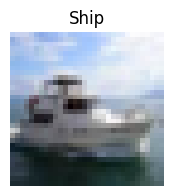

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ generator_noise_in… │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 8192)      │    819,200 │ generator_noise_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ generator_label_in… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 8192)      │     32,768 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │        500 │ generator_label_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 8192)      │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 64)     │      3,264 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 8, 8, 128) │          0 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 8, 8, 1)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8, 8, 129) │          0 │ reshape_1[0][0],  │
│ (Concatenate)       │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │    264,320 │ concatenate[0][0] │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 32, 32,    │    262,272 │ leaky_re_lu_1[0]… │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32, 3) │      3,459 │ leaky_re_lu_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,386,807 (5.29 MB)

 Trainable params: 1,369,911 (5.23 MB)

 Non-trainable params: 16,896 (66.00 KB)

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ discriminator_labe… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 50)     │        500 │ discriminator_la… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 1024)   │     52,224 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ discriminator_imag… │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 32, 32, 1) │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32, 32, 4) │          0 │ discriminator_im… │
│ (Concatenate)       │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │      2,368 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 16, 16,    │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 16,    │          0 │ leaky_re_lu_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 8, 8, 128) │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 8, 8, 128) │          0 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8192)      │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      8,193 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 137,141 (535.71 KB)

 Trainable params: 137,141 (535.71 KB)

 Non-trainable params: 0 (0.00 B)

Starting epoch 1/50


Epoch 1:   0%|          | 0/3125 [00:00<?, ?it/s]

Epoch 1 | Generator Loss: 0.8453 | Discriminator Loss: 1.2895 | Time: 796.24 sec


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['generator_noise_input', 'generator_label_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [ ]:
# Ensure TensorFlow 2.x is being used
import tensorflow as tf
assert tf.__version__.startswith('2'), "This notebook requires TensorFlow 2.x"

# Enable inline plotting
%matplotlib inline

# Necessary imports
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter compatibility

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# -------------------------------
# Parameters and Configuration
# -------------------------------
batch_size = 16
epoch_count = 50
noise_dim = 100
n_class = 10
tags = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
        'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
img_size = 32

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------
(X_train, y_train), (_, _) = cifar10.load_data()

# Normalize images to [-1, 1]
X_train = (X_train.astype('float32') - 127.5) / 127.5

# Create tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

# Plotting a random image from the dataset
plt.figure(figsize=(2, 2))
idx = np.random.randint(0, len(X_train))
img = image.array_to_img((X_train[idx] * 127.5 + 127.5).astype('uint8'))
plt.imshow(img)
plt.axis('off')
plt.title(tags[y_train[idx][0]])
plt.show()

# -------------------------------
# Model Definitions
# -------------------------------

def build_generator():
    # Label input
    in_label = tf.keras.layers.Input(shape=(1,), name='generator_label_input')
    
    # Embedding for categorical input
    li = tf.keras.layers.Embedding(n_class, 50)(in_label)
    
    # Linear transformation
    n_nodes = 8 * 8
    li = tf.keras.layers.Dense(n_nodes)(li)
    
    # Reshape to add as a channel
    li = tf.keras.layers.Reshape((8, 8, 1))(li)
    
    # Noise input
    in_lat = tf.keras.layers.Input(shape=(noise_dim,), name='generator_noise_input')
    
    # Foundation for 8x8 feature maps
    gen = tf.keras.layers.Dense(128 * 8 * 8, use_bias=False)(in_lat)
    gen = tf.keras.layers.BatchNormalization()(gen)
    gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)
    
    # Reshape to start convolutional stack
    gen = tf.keras.layers.Reshape((8, 8, 128))(gen)
    
    # Concatenate label embedding
    merge = tf.keras.layers.Concatenate()([gen, li])  # Shape: (8, 8, 129)
    
    # First Conv2DTranspose layer
    gen = tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(merge)  # 16x16x128
    gen = tf.keras.layers.BatchNormalization()(gen)
    gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)
    
    # Second Conv2DTranspose layer
    gen = tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(gen)  # 32x32x128
    gen = tf.keras.layers.BatchNormalization()(gen)
    gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)
    
    # Output layer
    out_layer = tf.keras.layers.Conv2D(3, (3, 3), activation='tanh', padding='same')(gen)  # 32x32x3
    
    model = Model([in_lat, in_label], out_layer, name='Generator')
    return model

def build_discriminator():
    # Image input
    in_image = tf.keras.layers.Input(shape=(img_size, img_size, 3), name='discriminator_image_input')
    
    # Label input
    in_label = tf.keras.layers.Input(shape=(1,), name='discriminator_label_input')
    
    # Embedding for categorical input
    li = tf.keras.layers.Embedding(n_class, 50)(in_label)
    
    # Linear transformation
    n_nodes = img_size * img_size
    li = tf.keras.layers.Dense(n_nodes)(li)
    
    # Reshape to add as a channel
    li = tf.keras.layers.Reshape((img_size, img_size, 1))(li)
    
    # Concatenate image and label embedding
    merge = tf.keras.layers.Concatenate()([in_image, li])  # Shape: (32, 32, 4)
    
    # Convolutional layers
    d = tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same')(merge)
    d = tf.keras.layers.LeakyReLU(alpha=0.2)(d)
    d = tf.keras.layers.Dropout(0.3)(d)
    
    d = tf.keras.layers.Conv2D(128, (3,3), strides=(2,2), padding='same')(d)
    d = tf.keras.layers.LeakyReLU(alpha=0.2)(d)
    d = tf.keras.layers.Dropout(0.3)(d)
    
    d = tf.keras.layers.Flatten()(d)
    d = tf.keras.layers.Dense(1, activation='sigmoid')(d)
    
    model = Model([in_image, in_label], d, name='Discriminator')
    return model

# Instantiate and summarize the generator and discriminator
g_model = build_generator()
g_model.summary()

d_model = build_discriminator()
d_model.summary()

# -------------------------------
# Loss Functions and Optimizers
# -------------------------------

# Define Binary Cross Entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)  # Real labels as 1
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)  # Fake labels as 0
    total_loss = real_loss + fake_loss
    return total_loss

# Generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)  # Try to fool discriminator

# Define optimizers
d_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
g_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# -------------------------------
# Training Step
# -------------------------------

@tf.function
def train_step(images, labels):
    # Reshape labels to match batch size
    labels = tf.reshape(labels, (-1, 1))
    
    # Generate random noise
    random_latent_vectors = tf.random.normal(shape=(tf.shape(images)[0], noise_dim))
    
    with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
        # Generate fake images
        generated_images = g_model([random_latent_vectors, labels], training=True)
        
        # Discriminator predictions
        real_output = d_model([images, labels], training=True)
        fake_output = d_model([generated_images, labels], training=True)
        
        # Calculate losses
        disc_loss = discriminator_loss(real_output, fake_output)
        gen_loss = generator_loss(fake_output)
    
    # Calculate gradients
    gradients_of_discriminator = disc_tape.gradient(disc_loss, d_model.trainable_variables)
    gradients_of_generator = gen_tape.gradient(gen_loss, g_model.trainable_variables)
    
    # Apply gradients
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, d_model.trainable_variables))
    g_optimizer.apply_gradients(zip(gradients_of_generator, g_model.trainable_variables))
    
    return disc_loss, gen_loss

# -------------------------------
# Helper Function to Plot Generated Images
# -------------------------------

def show_samples(num_samples, n_class, g_model):
    fig, axes = plt.subplots(n_class, num_samples, figsize=(num_samples * 2, n_class * 2)) 
    fig.tight_layout()
    fig.subplots_adjust(wspace=None, hspace=0.2)

    for l in range(n_class):
        for j in range(num_samples):
            # Generate random noise
            random_noise = tf.random.normal(shape=(1, noise_dim))
            label = tf.constant([[l]])
            
            # Generate image
            gen_img = g_model.predict([random_noise, label])[0]
            gen_img = (gen_img * 127.5 + 127.5).astype(np.uint8)
            
            # Plot image
            axes[l, j].imshow(gen_img)
            axes[l, j].axis('off')
            
            # Set row labels
            if j == 0:
                axes[l, j].set_ylabel(tags[l], fontsize=12)
    plt.show()

# -------------------------------
# Training Loop
# -------------------------------

def train(dataset, epochs=epoch_count):
    for epoch in range(1, epochs + 1):
        print(f"Starting epoch {epoch}/{epochs}")
        start_time = time.time()
        
        d_loss_list = []
        g_loss_list = []
        
        # Iterate over batches
        for image_batch, label_batch in tqdm(dataset, desc=f"Epoch {epoch}", leave=False):
            d_loss, g_loss = train_step(image_batch, label_batch)
            d_loss_list.append(d_loss)
            g_loss_list.append(g_loss)
        
        # Calculate average losses
        avg_d_loss = tf.reduce_mean(d_loss_list).numpy()
        avg_g_loss = tf.reduce_mean(g_loss_list).numpy()
        
        # Display progress
        print(f"Epoch {epoch} | Generator Loss: {avg_g_loss:.4f} | Discriminator Loss: {avg_d_loss:.4f} | Time: {time.time() - start_time:.2f} sec")
        
        # Generate and display samples every epoch
        show_samples(num_samples=3, n_class=n_class, g_model=g_model)


train(dataset, epochs=epoch_count)
